In [1]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
from subpixel_edges import subpixel_edges

# load image

In [2]:
image_path = "./examples/images/circle2.png"

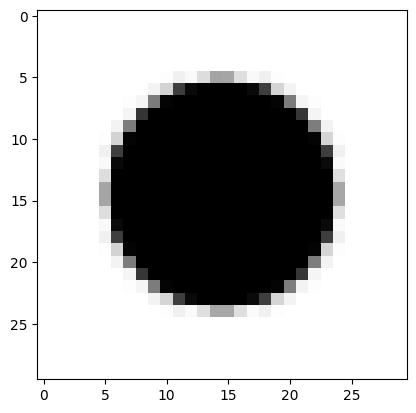

In [3]:
image1 = cv2.imread(image_path)
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.imshow(image1_gray, cmap="gray")

In [4]:
image_h, image_w = image1_gray.shape
image_h, image_w

(30, 30)

# subpixel_edges

In [5]:
# (optional)
help(subpixel_edges)

Help on function subpixel_edges in module subpixel_edges:

subpixel_edges(image: numpy.ndarray, threshold: int | float, iters: int = 0, order: int = 2)
    Detects subpixel features for each pixel belonging to an edge in `img`.
    
    The subpixel edge detection used the method published in the following paper:
    "Accurate Subpixel Edge Location Based on Partial Area Effect"
    http://www.sciencedirect.com/science/article/pii/S0262885612001850
    
    Parameters
    ----------
    image: ndarray
        A grayscale image.
    threshold: int or float
        Specifies the minimum difference of intensity at both
        sides of a pixel to be considered as an edge.
    iters: int
        Specifies how many smoothing iterations are needed
        to find the final edges:
            0:  Oriented to noise free images. No previous smoothing on
                the image. The detection is applied on the original
                image values (section 3 of the paper).
            1:  Orie

In [6]:
edges, grad, absGxInner, absGyInner = subpixel_edges(
    image1_gray, threshold=10, iters=1, order=2
)
edges

In [7]:
len(edges.x), len(edges.y), len(edges.nx), len(edges.ny)

(52, 52, 52, 52)

In [8]:
print(edges.x[:5])
print(edges.y[:5])
print(edges.nx[:5])
print(edges.ny[:5])

[ 9.  9. 10. 10. 11.]
[ 6.90212418 22.09297386  6.2495098  22.74836601  5.78872549]
[-0.60843154 -0.60843154 -0.4938727  -0.49430222 -0.37086736]
[-0.79360636  0.79360636 -0.86953422  0.86929012 -0.92868585]


In [9]:
edges.curv

array([0.10519131, 0.10388459, 0.12289512, 0.12365033, 0.12040455,
       0.12153354, 0.13107918, 0.13370982, 0.05686802, 0.05440298,
       0.12221239, 0.11961213, 0.12086897, 0.12089798, 0.05434056,
       0.05312264, 0.13233227, 0.13370982, 0.1213695 , 0.12153354,
       0.12268821, 0.12289512, 0.10443901, 0.10519131, 0.05562035,
       0.12089798, 0.12089798, 0.05562035, 0.12193297, 0.12249854,
       0.13120089, 0.13120089, 0.12249854, 0.12268821, 0.10463696,
       0.10443901, 0.11144737, 0.11122921, 0.11144737, 0.11166577,
       0.10388459, 0.10388459, 0.12365033, 0.12153354, 0.13370982,
       0.13370982, 0.12153354, 0.12365033, 0.05312264, 0.12089798,
       0.12089798, 0.05312264])

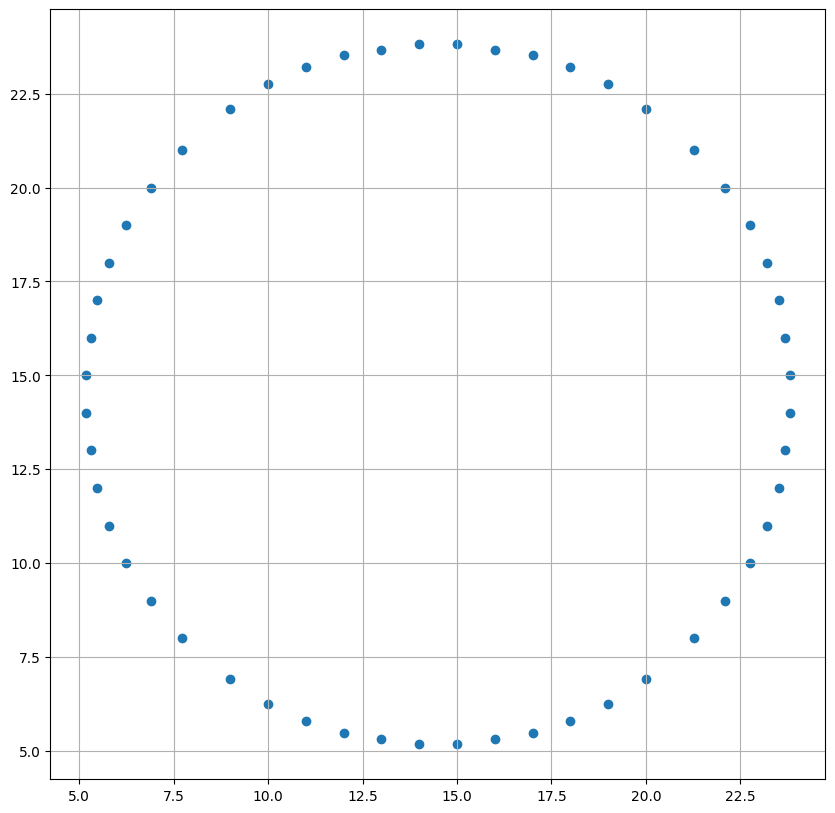

In [10]:
plt.figure(figsize=(10, 10))
plt.scatter(edges.x, edges.y)
plt.grid()

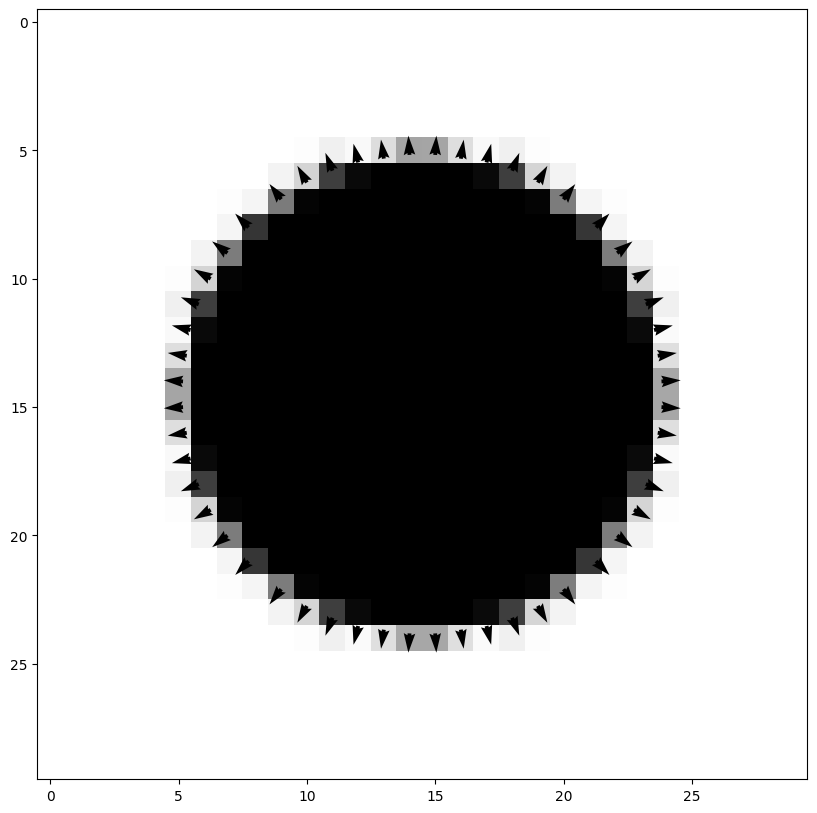

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(image1)
# 绘制箭头
# X: 起始点的x坐标数组
# Y: 起始点的y坐标数组
# U: 向量在x轴上的分量数组,箭头的方向
# V: 向量在y轴上的分量数组,箭头的方向
# C: 作为可选参数用来设置颜色
# units: 此参数指示了除箭头长度外，其他尺寸的变化趋势，以该单位的倍数测量。可取值为 {'width', 'height', 'dots', 'inches', 'x', 'y' 'xy'}, 默认是 'width'。需要配合 scale 参数使用。
# scale: float, optional。此参数是每个箭头长度单位的数据单位数，通常该值越小，意味着箭头越长，默认为 None ,此时系统会采用自动缩放算法。箭头长度单位由 scale_units 参数指定。
# scale_units: 此参数是可选参数，其中包含以下值：{'width', 'height', 'dots', 'inches', 'x', 'y', 'xy'}, 一般当 scale=None 时该选项指示长度单位，默认为 None。
# angles: 此参数指定了确定箭头角的方法，可以取 {'uv', 'xy'} 或者 array-like, 默认是 'uv'。
#         设计原因是 因为图的宽和高可能不同，所以 x 方向的单位长度和 y 方向的单位长度可能不同，这时我们需要做出选择，一是不管长度对不对，角度一定要对，
#         此时 angles='uv'，二是不管角度了，只要长度对就可以了，此时 angles='xy'。当该值为一个 array 的时候，该数组应该是以度数为单位的数组，表示了每一个箭头的方向
plt.quiver(edges.x, edges.y, edges.nx, -edges.ny, scale=40)
plt.show()